In [1]:
import librosa
import numpy as np
import soundfile as sf
import scipy.signal as signal

def load_audio(file_path):
    audio, sr = librosa.load(file_path, sr=None)
    return audio, sr

def noise_filter(audio, sr): # this can be customized based on our noise_process
    # Apply a high-pass filter to remove low-frequency noise
    sos = signal.butter(10, 1000, 'hp', fs=sr, output='sos')
    filtered_audio = signal.sosfilt(sos, audio)
    return filtered_audio


In [2]:
def detect_cyclic_signals(audio, sr):
    # Apply Fourier Transform
    frequencies, times, Sxx = signal.spectrogram(audio, sr)
    # Detect significant frequencies (indicative of cyclic bird calls)
    cyclic_signals = np.mean(Sxx, axis=1)
    return frequencies, cyclic_signals


In [3]:
def stochastic_resonance(audio, sr, noise_level=0.1):
    # Add Gaussian noise to the signal
    noisy_signal = audio + noise_level * np.random.normal(0, 1, len(audio))
    
    # Apply a nonlinear transformation (thresholding)
    amplified_signal = np.where(noisy_signal > np.mean(noisy_signal), noisy_signal, 0)
    
    # Reconstruct the signal and return
    return amplified_signal


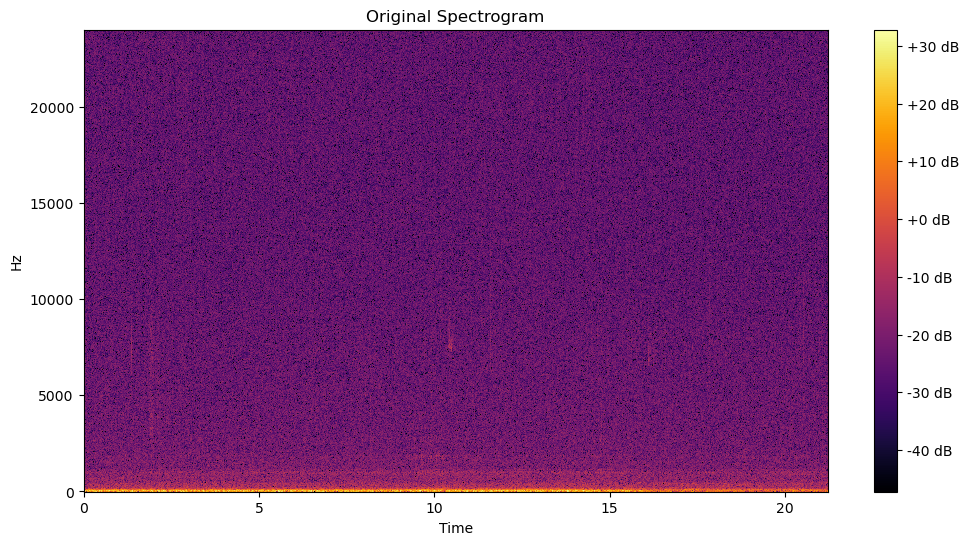

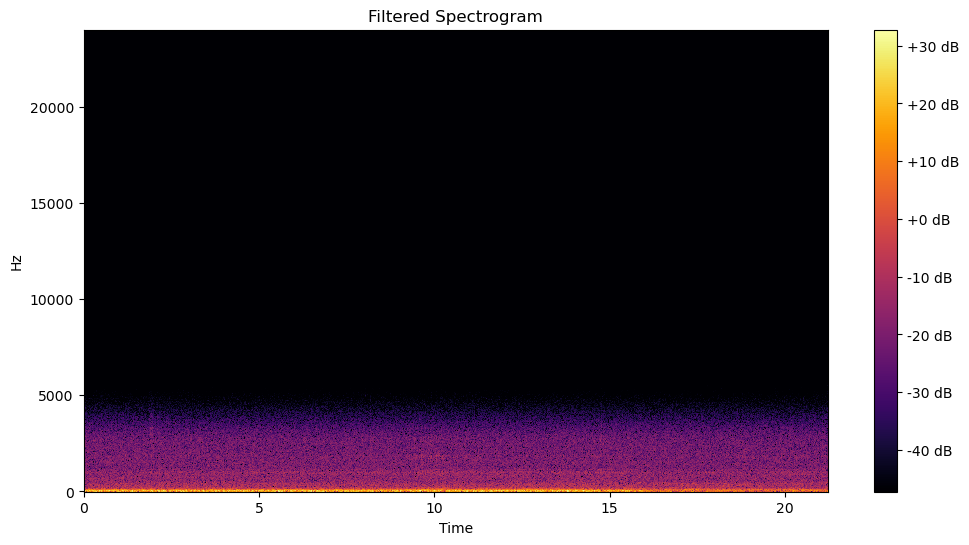

Processing complete. Enhanced audio saved as 'enhanced_audio.wav'.


In [12]:
import os
import librosa
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter
import soundfile as sf

def load_audio(file_list):
    """Load audio files and return combined audio and sample rate."""
    audio_data = []
    sr = None
    
    for file_name in file_list:
        audio, sr_temp = librosa.load(file_name, sr=None, mono=True)
        audio_data.append(audio)
        if sr is None:
            sr = sr_temp  # Set sample rate from the first file

    return np.concatenate(audio_data), sr

def noise_filter(audio, sr, cutoff=3000, order=6):
    """Apply a Butterworth low-pass filter to remove high-frequency noise."""
    nyquist = 0.5 * sr
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    filtered_audio = lfilter(b, a, audio)
    return filtered_audio

def save_audio_segment(audio, sr, file_name):
    """Save the processed audio segment to a file."""
    sf.write(file_name, audio, sr)

def plot_spectrogram(audio, sr, title='Spectrogram'):
    """Plot the spectrogram of the given audio signal."""
    X = librosa.stft(audio)
    Xdb = librosa.amplitude_to_db(np.abs(X))
    
    plt.figure(figsize=(12, 6))
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz', cmap='inferno')
    plt.colorbar(format='%+2.0f dB')
    plt.title(title)
    plt.show()

# Set the directory path
directory = r'D:\Professional\Projects\Biodiversity\final\analysis_task\Data\External\material_Bird Fly monitoring and analyse\material_Bird Fly monitoring and analyse\2n_data material\Audiodateien'

# List of specific audio files you want to analyze (include the .wav extension)
specific_files = [
   os.path.join(directory, '2460412.314690_Tautenburg___6322-10530kHz___10-11.3s___st.wav'),
]

# Example usage
audio, sr = load_audio(specific_files)

# Plot original spectrogram
plot_spectrogram(audio, sr, title='Original Spectrogram')

# Apply noise filtering
filtered_audio = noise_filter(audio, sr)

# Plot filtered spectrogram
plot_spectrogram(filtered_audio, sr, title='Filtered Spectrogram')

# Save the processed audio
save_audio_segment(filtered_audio, sr, 'enhanced_audio.wav')

print("Processing complete. Enhanced audio saved as 'enhanced_audio.wav'.")


# snr ration , before and after



In [ ]:
import numpy as np
import soundfile as sf

# Function to calculate signal-to-noise ratio (SNR)
def calculate_snr(clean_signal, noisy_signal):
    # Compute power of the signal
    signal_power = np.mean(clean_signal ** 2)
    # Compute power of the noise (difference between noisy and clean signal)
    noise_power = np.mean((clean_signal - noisy_signal) ** 2)
    # SNR in dB
    snr = 10 * np.log10(signal_power / noise_power)
    return snr

# Function to load the audio file
def load_audio(file_path):
    audio, sr = sf.read(file_path)
    return audio, sr

# Example usage:
# Load the original audio and noisy audio
clean_audio_path = "path_to_clean_audio.wav"  # Replace with the actual path
noisy_audio_path = "path_to_noisy_audio.wav"  # Replace with the actual path

clean_audio, sr_clean = load_audio(clean_audio_path)
noisy_audio, sr_noisy = load_audio(noisy_audio_path)

# Ensure the sampling rates are the same
assert sr_clean == sr_noisy, "Sampling rates of clean and noisy signals must match."

# Calculate SNR before noise filtering
snr_before = calculate_snr(clean_audio, noisy_audio)
print(f"SNR before filtering: {snr_before} dB")

# Process the noisy audio (apply your noise filter or processing method)
filtered_audio = noise_filter(noisy_audio, sr_noisy)  # Replace this with your actual noise filtering function

# Calculate SNR after noise filtering
snr_after = calculate_snr(clean_audio, filtered_audio)
print(f"SNR after filtering: {snr_after} dB")


#using spectrogram


# roc curves

# **wavelet transform** and **empirical mode decomposition (EMD)** 
